In [1]:
!source ./bin/activate

In [42]:
# importing python libs 
import pandas as pd 
from sklearn.impute import SimpleImputer # fixing missing values 
import numpy as np
from sklearn.preprocessing import LabelEncoder # label encoding for 2 values in single column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [3]:
file = "https://raw.githubusercontent.com/redashu/Datasets/refs/heads/master/data_preprocess1.csv"
df = pd.read_csv(file)
print(df.head())

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    30 non-null     object 
 1   Age        29 non-null     float64
 2   Salary     28 non-null     float64
 3   Purchased  30 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.1+ KB


In [5]:
#bottom rows
df.tail()

,Country,Age,Salary,Purchased
25,Germany,43.0,74000.0,No
26,France,52.0,88000.0,Yes
27,Spain,46.0,78000.0,No
28,Germany,25.0,45000.0,Yes
29,France,53.0,90000.0,No


In [6]:
#access a column
df['Country']

0      France
1       Spain
2     Germany
3       Spain
4     Germany
5      France
6       Spain
7      France
8     Germany
9      France
10    Germany
11     France
12      Spain
13    Germany
14     France
15      Spain
16    Germany
17     France
18      Spain
19    Germany
20     France
21      Spain
22    Germany
23     France
24      Spain
25    Germany
26     France
27      Spain
28    Germany
29     France
Name: Country, dtype: object

In [7]:
#multiple columns
df[['Age', 'Salary']]

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN
5,35.0,58000.0
6,NaN,52000.0
7,48.0,79000.0
8,50.0,83000.0
9,37.0,67000.0


In [8]:
#use dataframe iloc
df.iloc[:,0:2]

,Country,Age
0,France,44.0
1,Spain,27.0
2,Germany,30.0
3,Spain,38.0
4,Germany,40.0
5,France,35.0
6,Spain,NaN
7,France,48.0
8,Germany,50.0
9,France,37.0


In [9]:
#separate into input and output

input_features = df.iloc[:,0:3].values
label = df.iloc[:,-1].values

In [10]:
label

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
      dtype=object)

In [11]:
input_features

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0],
       ['Germany', 28.0, 49000.0],
       ['France', 42.0, 75000.0],
       ['Spain', 33.0, 56000.0],
       ['Germany', 45.0, 77000.0],
       ['France', 29.0, 51000.0],
       ['Spain', 51.0, 85000.0],
       ['Germany', 36.0, nan],
       ['France', 31.0, 55000.0],
       ['Spain', 39.0, 63000.0],
       ['Germany', 47.0, 80000.0],
       ['France', 26.0, 47000.0],
       ['Spain', 32.0, 53000.0],
       ['Germany', 41.0, 71000.0],
       ['France', 49.0, 82000.0],
       ['Spain', 34.0, 57000.0],
       ['Germany', 43.0, 74000.0],
       ['France', 52.0, 88000.0],
       ['Spain', 46.0, 78000.0],
       ['Germany', 25.0, 45000.0],
       ['France', 53.0

In [12]:
#fixing age missing value
riley_impute = SimpleImputer(missing_values = np.nan, strategy= 'mean')

In [13]:
riley_impute.fit(input_features[:,1:3])
input_features[:,1:3] = riley_impute.transform(input_features[:,1:3])

In [14]:
input_features

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 66071.42857142857],
       ['France', 35.0, 58000.0],
       ['Spain', 39.0, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0],
       ['Germany', 28.0, 49000.0],
       ['France', 42.0, 75000.0],
       ['Spain', 33.0, 56000.0],
       ['Germany', 45.0, 77000.0],
       ['France', 29.0, 51000.0],
       ['Spain', 51.0, 85000.0],
       ['Germany', 36.0, 66071.42857142857],
       ['France', 31.0, 55000.0],
       ['Spain', 39.0, 63000.0],
       ['Germany', 47.0, 80000.0],
       ['France', 26.0, 47000.0],
       ['Spain', 32.0, 53000.0],
       ['Germany', 41.0, 71000.0],
       ['France', 49.0, 82000.0],
       ['Spain', 34.0, 57000.0],
       ['Germany', 43.0, 74000.0],
       ['France', 52.0, 88000.0],
       ['Spain', 46.0, 78000.0],
       ['Germany', 25.0, 450

In [15]:
#convert 2 values into binary 0,1
le = LabelEncoder()
label = le.fit_transform(label)
print(label)

[0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0]


In [16]:
# preprocessing using categorical values
ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0])], remainder='passthrough')

In [17]:
input_features= np.array(ct.fit_transform(input_features))

In [18]:
print(input_features)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 66071.42857142857]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 39.0 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]
 [0.0 1.0 0.0 28.0 49000.0]
 [1.0 0.0 0.0 42.0 75000.0]
 [0.0 0.0 1.0 33.0 56000.0]
 [0.0 1.0 0.0 45.0 77000.0]
 [1.0 0.0 0.0 29.0 51000.0]
 [0.0 0.0 1.0 51.0 85000.0]
 [0.0 1.0 0.0 36.0 66071.42857142857]
 [1.0 0.0 0.0 31.0 55000.0]
 [0.0 0.0 1.0 39.0 63000.0]
 [0.0 1.0 0.0 47.0 80000.0]
 [1.0 0.0 0.0 26.0 47000.0]
 [0.0 0.0 1.0 32.0 53000.0]
 [0.0 1.0 0.0 41.0 71000.0]
 [1.0 0.0 0.0 49.0 82000.0]
 [0.0 0.0 1.0 34.0 57000.0]
 [0.0 1.0 0.0 43.0 74000.0]
 [1.0 0.0 0.0 52.0 88000.0]
 [0.0 0.0 1.0 46.0 78000.0]
 [0.0 1.0 0.0 25.0 45000.0]
 [1.0 0.0 0.0 53.0 90000.0]]


In [32]:
#finally we have input and label for training
train_input, test_input, train_label, test_label = train_test_split(input_features, label, test_size = 0.1) #range from 0-1, .1 is 10 percent testing.

In [33]:
#calling decision tree classifier
classifier = DecisionTreeClassifier()

In [34]:
#training classifier with split data
trained_model = classifier.fit(train_input,train_label)

In [35]:
#test model
predicted_values = trained_model.predict(test_input)

In [36]:
print(predicted_values)

[1 0 1]


In [37]:
print(test_label)

[0 1 1]


In [41]:
#evaluate using accuracy score
accuracy_score(test_label,predicted_values)
#output is from 0-1 

0.3333333333333333

In [ ]:
# test by inout new random data
riley_new_data = np.array([['Spain', '39', '51000']])

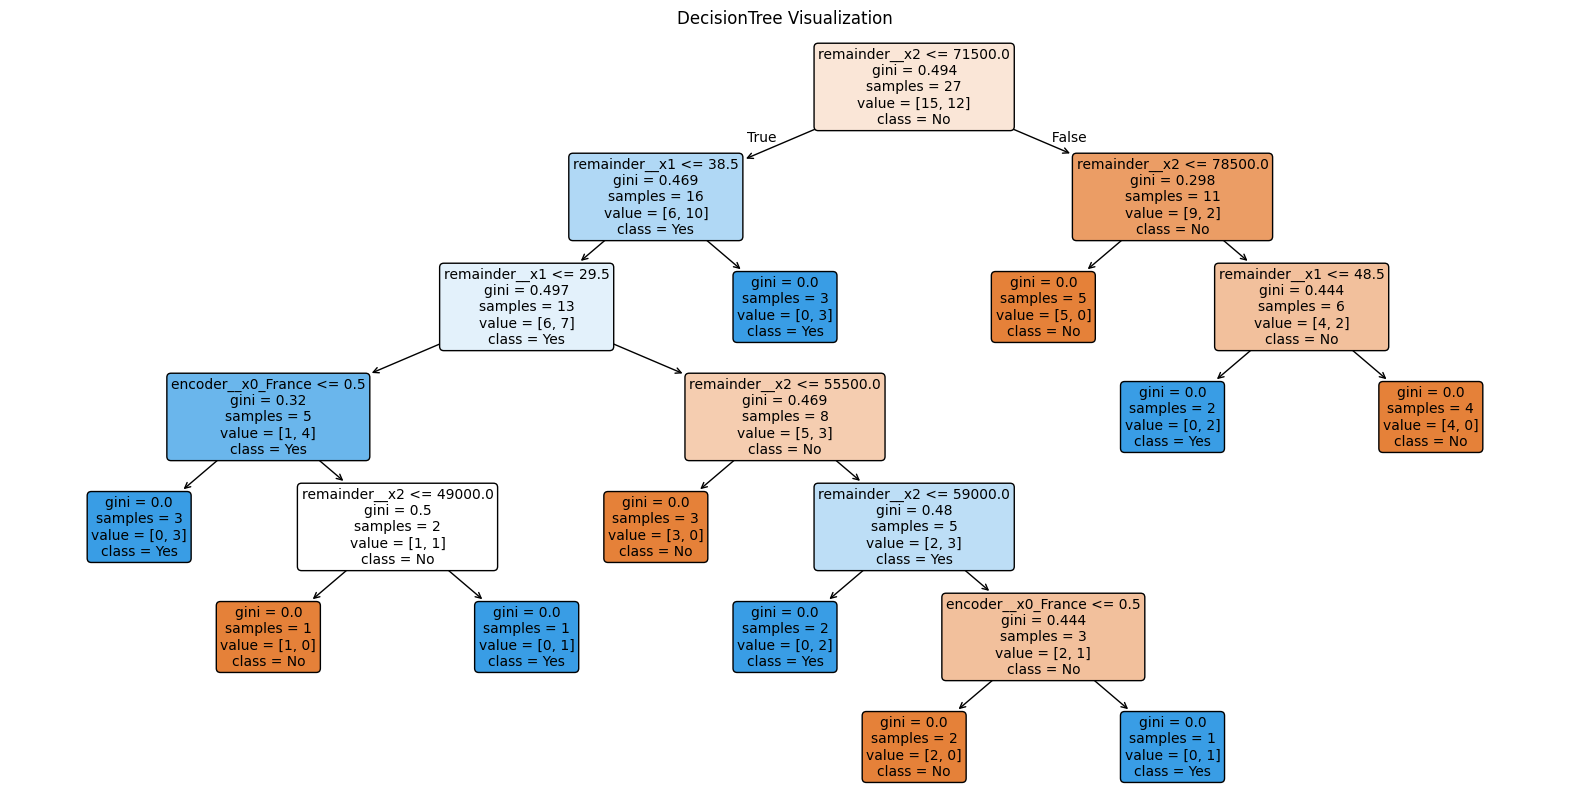

In [48]:
#use python to check dec tree graph
plt.figure(figsize=(20,10))
plot_tree(classifier,
         feature_names = ct.get_feature_names_out(),
         class_names=le.classes_,
         filled=True,
         fontsize=10,
         rounded=True)
plt.title("DecisionTree Visualization")
plt.show()

In [43]:
#features and labels
le.classes_

array(['No', 'Yes'], dtype=object)

In [44]:
ct.get_feature_names_out()

array(['encoder__x0_France', 'encoder__x0_Germany', 'encoder__x0_Spain',
       'remainder__x1', 'remainder__x2'], dtype=object)